## 1) OBJECTIVE: 
### To build a stable model which is able to predict whether the passenger will survive or not based on different passenger details.

## 2) UNDERSTANDING THE DATA:
* The data consist of train and test data csv file.
* train data is used to fit into the best possible model with better results.
* once the desired results are obtained the unseen test data is fed into the model to check the results and examine that how our model is performing on the unseen data.
* we also have gender_submission csv file, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

#### FEATURES IN THE DATA:
* pclass	Ticket class ------> 1 = 1st, 2 = 2nd, 3 = 3rd
* sex -----> Sex
* Age -----> Age in years
* sibsp -----> # of siblings / spouses aboard the Titanic
* parch -----> # of parents / children aboard the Titanic
* ticket -----> Ticket number
* fare -----> Passenger fare
* cabin	Cabin number
* embarked -----> Port of Embarkation -------> C = Cherbourg, Q = Queenstown, S = Southampton
* survival -----> Survival-----> 0 = 'No', 1 = 'Yes' (target Variable)


## 3) IMPORTING THE REQUIRED LIBRARIES:

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from statistics import stdev
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

## 4) IMPORTING THE DATA:

In [2]:
train_data = pd.read_csv(r'C:\Users\sksho\Desktop\Skillvertex\Major Project\Dataset\train.csv')
test_data = pd.read_csv(r'C:\Users\sksho\Desktop\Skillvertex\Major Project\Dataset\test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Note: 
* Changing the column Survived position in the train_data.
* For easy understanding the target variables.

In [4]:
new_cols = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']
train_data =train_data.reindex(columns = new_cols)

In [5]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Note:
* We need to join the train and test data to one data so that we can apply all preprocessing steps only once and seperate train and test data back to origional.

## 5) DATA PREPROCESSING:

In [7]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [8]:
data = pd.concat([train_data,test_data])

In [9]:
data.shape

(1309, 12)

In [10]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [11]:
data['PassengerId'].nunique(), data['Ticket'].nunique()

(1309, 929)

#### Note:
* We can note passesngerId has all unique columns hence it will not make any contribution to our analysis.
* Also the name column has no significance in our analysis.
* Also Ticket column has the 929 unique records which has no role to play in our analysis.
* Hence we will drop these 3 columns dro our data.

In [12]:
data.drop(['PassengerId','Name','Ticket'],axis = 1, inplace =True)

In [13]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0.0
1,1,female,38.0,1,0,71.2833,C85,C,1.0
2,3,female,26.0,0,0,7.9250,NaN,S,1.0
3,1,female,35.0,1,0,53.1000,C123,S,1.0
4,3,male,35.0,0,0,8.0500,NaN,S,0.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Cabin     295 non-null    object 
 7   Embarked  1307 non-null   object 
 8   Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


In [15]:
missing_data_columns = {'Age':[data['Age'].isnull().sum(),((data['Age'].isnull().sum()/1309)*100).round(2)],
               'Fare':[data['Fare'].isnull().sum(),((data['Fare'].isnull().sum()/1309)*100).round(2)],
               'Cabin':[data['Cabin'].isnull().sum(),((data['Cabin'].isnull().sum()/1309)*100).round(2)],
               'Embarked':[data['Embarked'].isnull().sum(),((data['Embarked'].isnull().sum()/1309)*100).round(2)]}
missing_data = pd.DataFrame(missing_data_columns, index= ['No. of missing Records', '% of missing records'])
missing_data

,Age,Fare,Cabin,Embarked
No. of missing Records,263.00,1.00,1014.00,2.00
% of missing records,20.09,0.08,77.46,0.15


#### Note:
* We can observe that Age, Fare, Cabin, Embarked has null values:
* Out of which Age and Cabin which contributes maximum number of missing records in the data. 
* Null values in the 'Age' and 'Fare' column can be treated using the mean value.
* Null values in the 'Embarked' can be treated using the mode value.
* while the column 'Cabin' can be dropped as it will not contribute in our analysis.

In [16]:
data.drop(['Cabin'], axis=1, inplace =True)

In [17]:
data['Age'].fillna(data['Age'].mean(), inplace =True)
data['Fare'].fillna(data['Fare'].mean(), inplace =True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace =True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


#### Note:
* We can observe that all the null values have been treated.


In [19]:
data['Sex'] = data['Sex'].map({'male':0,'female':1}).astype(int)
data['Embarked'] = data['Embarked'].map({'C':0,'S':1,'Q':2}).astype(int)

In [20]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,1,0.0
1,1,1,38.0,1,0,71.2833,0,1.0
2,3,1,26.0,0,0,7.9250,1,1.0
3,1,1,35.0,1,0,53.1000,1,1.0
4,3,0,35.0,0,0,8.0500,1,0.0


In [21]:
data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,2.294882,0.355997,29.881138,0.498854,0.385027,33.295479,0.887701,0.383838
std,0.837836,0.478997,12.883193,1.041658,0.865560,51.738879,0.536505,0.486592
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,3.000000,0.000000,29.881138,0.000000,0.000000,14.454200,1.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,1.000000


#### Note:
* We can observe that the mean age of the passengers travelling is 29 years with a fare of 33.

## 6) EXPLORATORY DATA ANALYSIS:

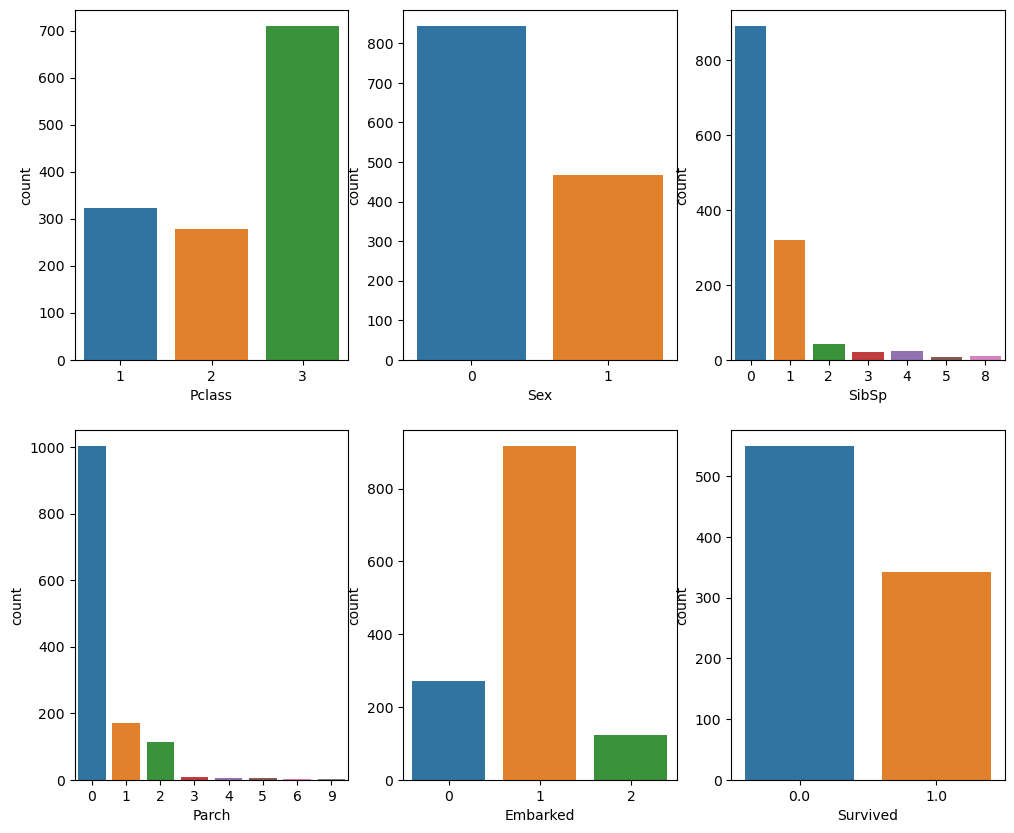

In [22]:
figure, ax = plt.subplots(2,3, figsize = (12,10))
sns.countplot(data['Pclass'], ax = ax[0][0])
sns.countplot(data['Sex'], ax = ax[0][1])
sns.countplot(data['SibSp'], ax = ax[0][2])
sns.countplot(data['Parch'], ax = ax[1][0])
sns.countplot(data['Embarked'], ax = ax[1][1])
sns.countplot(data['Survived'], ax = ax[1][2])
plt.show()

#### Note:
* The count of passengers travelling 3rd class ticket is more compared to the 1st and 2nd class passengers.
* Male passengers are more as compared to the Female passengers.
* Most of the passengers have been embarked from Southampton.

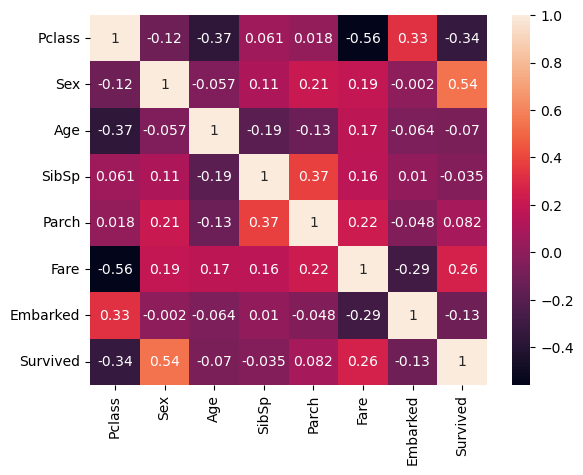

In [23]:
sns.heatmap(data.corr(), annot =True)
plt.show()

#### Note:
* From the above correlation it can observed that 'Sex' of the passenger has highest correlation with the 'survived' feature.

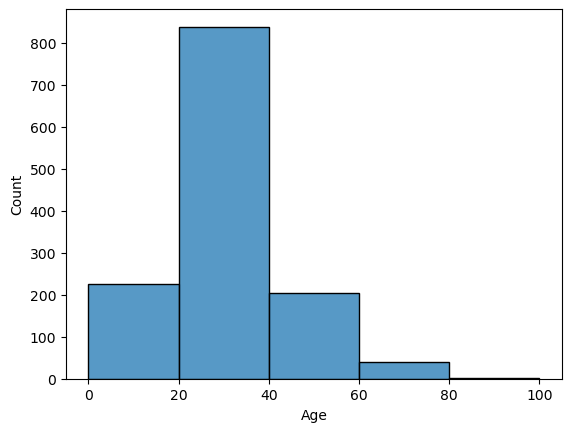

In [24]:
sns.histplot(data['Age'], bins=[0,20,40,60,80,100])
plt.show()

#### Note:
* maximum number of passengers lies between 20-40 years.

#### Note:
* Since Our Data Pre-Processing is done for whole data we can split the data into new_train_data and new_test_data

In [25]:
new_train_data = data.iloc[:891]
new_test_data = data.iloc[891:,:7]

In [26]:
new_train_data.shape, new_test_data.shape

((891, 8), (418, 7))

#### Note:
* We will split the new_train_data into x_train and x_valid (validation set) so that we can test our scores on the validation set with different classification models once the the model is fixed we can do hyperparameter tuning and get final results once the stable model is finalised we can introduce the new_test_data which is unseen data to check how the model performs to the unseen data.
* The above procedure is done so that model does not encounter data leakage.

## 7) SPLITTING THE NEW_TRAIN_DATA INTO TRAIN AND VALIDATION SET:

In [27]:
x = new_train_data.drop('Survived', axis = 1)
y = new_train_data['Survived']

In [28]:
x.shape, y.shape

((891, 7), (891,))

In [29]:
x_train, x_valid, y_train, y_valid = tts(x,y, test_size = 0.2, random_state = 30, stratify = y)

## 8) MODEL SELECTION:

## i) MODEL 1- LOGISTIC REGRESSION:

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [32]:
LR_predict_train = LR.predict(x_train)
LR_predict_valid = LR.predict(x_valid)


In [33]:
print('The accuracy score of the train set is: ',(accuracy_score(y_train, LR_predict_train)*100).round(2))
print('The accuracy score of the validation set is: ',(accuracy_score(y_valid, LR_predict_valid)*100).round(2))
print('The standard deviation between the train and validation set is :',((accuracy_score(y_train, LR_predict_train)*100).round(2)-
     (accuracy_score(y_valid, LR_predict_valid)*100).round(2)).round(2))

The accuracy score of the train set is:  80.62
The accuracy score of the validation set is:  76.54
The standard deviation between the train and validation set is : 4.08


In [34]:
print(classification_report(y_valid,LR_predict_valid))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       110
         1.0       0.72      0.64      0.68        69

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179



#### Note:
* As we can see that our train_set has an accuracy of 80.62% where as our validation set has an accuracy of 76.54% and the standard deviation between train and validation set is 4.08 which under exceptable range. 

## ii) MODEL 2- DECISION TREE:

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
dtree_predict_train = dtree.predict(x_train)
dtree_predict_valid = dtree.predict(x_valid)

In [38]:
print('The accuracy score of the train set is: ',(accuracy_score(y_train, dtree_predict_train)*100).round(2))
print('The accuracy score of the validation set is: ',(accuracy_score(y_valid, dtree_predict_valid)*100).round(2))
print('The standard deviation between the train and validation set is :',((accuracy_score(y_train, dtree_predict_train)*100).round(2)-
     (accuracy_score(y_valid, dtree_predict_valid)*100).round(2)).round(2))

The accuracy score of the train set is:  98.6
The accuracy score of the validation set is:  76.54
The standard deviation between the train and validation set is : 22.06


In [39]:
print(classification_report(y_valid,dtree_predict_valid))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       110
         1.0       0.71      0.65      0.68        69

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179



#### Note:
* As we can see that the train set has an accuracy of 98.6% and the validation set has an accuracy of 75.42% with the standard deviation of 23.18 which is more.

## iii) MODEL 3- KNN:

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn =KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
knn_predict_train = knn.predict(x_train)
knn_predict_valid = knn.predict(x_valid)

In [43]:
print('The accuracy score of the train set is: ',(accuracy_score(y_train, knn_predict_train)*100).round(2))
print('The accuracy score of the validation set is: ',(accuracy_score(y_valid, knn_predict_valid)*100).round(2))
print('The standard deviation between the train and validation set is :',((accuracy_score(y_train, knn_predict_train)*100).round(2)-
     (accuracy_score(y_valid, knn_predict_valid)*100).round(2)).round(2))

The accuracy score of the train set is:  80.76
The accuracy score of the validation set is:  69.27
The standard deviation between the train and validation set is : 11.49


In [44]:
print(classification_report(y_valid,knn_predict_valid))

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       110
         1.0       0.62      0.51      0.56        69

    accuracy                           0.69       179
   macro avg       0.67      0.66      0.66       179
weighted avg       0.69      0.69      0.69       179



#### Note:
* As we can see that the train set has an accuracy of 80.76% and the validation set has an accuracy of 69.27% with the standard deviation of 11.49 which is more.

## 9) MODEL EVALUATION ON UNSEEN DATA:

In [45]:
LR_final_prediction = LR.predict(new_test_data)
LR_final_prediction

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

## 10) PREDICTION VERIFICATION BY GIVING RANDOM PASSENGER INPUTS TO THE MODEL: 

In [46]:
passenger_1_data = (3,0,34.5,0,0,7.82,2)

#### Note:
* As our data was trained in 2_Dimensional form we need to convert the data into numpy array reshape and reshape the data.

In [47]:
passenger_1_data_array = np.asarray(passenger_1_data)
reshaped_passenger_1_data_array = passenger_1_data_array.reshape(1,-1)

In [48]:
#Now giving the input of 1st passenger data and Predicting the data using our model:
survival_prediction = LR.predict(reshaped_passenger_1_data_array)

if (survival_prediction == 0):
    print('The passenger is dead.')
elif (survival_prediction == 1):
        print('The passenger is alive.')

The passenger is dead.


In [49]:
LR_final_prediction

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

#### Conclusion:
* From the prediction we can observe that the first passenger is dead which is predicted by the model.

## 13) LOADING THE MODEL:

In [ ]:
file_name = 'Finalized_model.sap'
pickle.dump(knn_final_model,open(file_name,'wb'))
loaded_model = pickle.load(open(file_name,'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

## 12) FUTURE USE OF THIS MODEL:

* In future if there is a ship which has a similar stucture as Titanic and to get prepared for unfortunate disasters like this, we can take necessary precautions to take care of the passengers.
